In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\Documents\Github\capstone-autoserved\Dataset\FINAL3.csv")

In [4]:
df.head()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,...,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
0,1,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,...,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
1,2,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,NaN,...,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
2,3,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,NaN,...,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
3,4,12/28/2018 10:18,33320,49,civic,Labor,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,NaN,...,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
4,5,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,...,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012


In [5]:
df.columns

Index(['Primary Key', 'Created', 'Mileage In', 'Work Order', 'Model',
       'Line Type', 'Service Category', 'Service Package', 'Description',
       'Definition', 'Price', 'Quantity', 'Total', 'Discount', 'Net Total',
       'ContactID', 'ServiceItemID', 'InvoiceID', 'labels', 'Make', 'Year'],
      dtype='object')

In [36]:
df_eda = df[['Mileage In', 'Work Order', 'Make', 'Model','Year','Service Category','labels','Net Total']]
df_eda['Unique Identifier'] = str(df['Work Order']) + df['Make'] + df['Model']

<ipython-input-36-b7bb442b1663>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Unique Identifier'] = str(df['Work Order']) + df['Make'] + df['Model']


In [39]:
df_eda.head()

,Mileage In,Work Order,Make,Model,Year,Service Category,labels,Net Total,Unique Identifier
0,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,696.43,0 49\n1 49\n2 49\n3...
1,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,142.86,0 49\n1 49\n2 49\n3...
2,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,227.68,0 49\n1 49\n2 49\n3...
3,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1339.29,0 49\n1 49\n2 49\n3...
4,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1178.56,0 49\n1 49\n2 49\n3...


### Mileage In Analysis

In [45]:
import scipy
shape, location, scale = scipy.stats.lognorm.fit(df['Mileage In'])
mu, sigma = np.log(scale), shape

<Figure size 864x720 with 0 Axes>

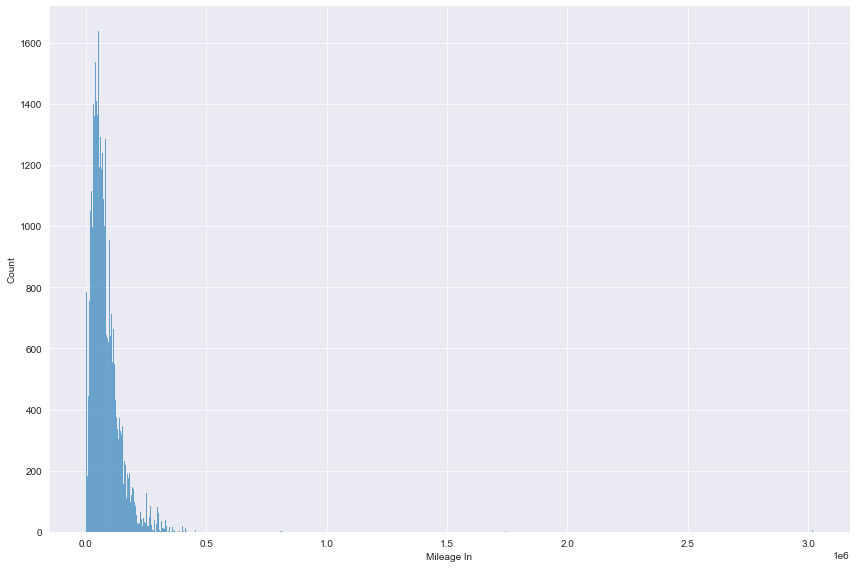

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
sns.displot(data = df, x = 'Mileage In', aspect= 1.5, height= 8)

In [53]:
def mileage_func(x):
    if x <= 10000:
        return '10k'
    if 10001 <= x < 20000:
        return '20k'
    if 20001 <= x < 30000:
        return '30k'
    if 30001 <= x < 40000:
        return '40k'
    if 40001 <= x < 50000:
        return '50k'
    if 50001 <= x < 60000:
        return '60k'
    if 60001 <= x < 70000:
        return '70k'
    if 70001 <= x < 80000:
        return '80k'
    if 80001 <= x < 90000:
        return '90k'
    if 90001 <= x < 100000:
        return '100k'
    if 100001 <= x < 110000:
        return '110k'
    if 110001 <= x < 120000:
        return '120k'
    if 120001 <= x < 130000:
        return '130k'
    if 130001 <= x < 140000:
        return '140k'
    if 140001 <= x < 150000:
        return '150k'
    if 150001 <= x < 160000:
        return '160k'
    if 160001 <= x < 170000:
        return '170k'
    if 170001 <= x < 180000:
        return '180k'
    if 180001 <= x < 190000:
        return '190k'
    if 190001 <= x < 200000:
        return '200k'
    else:
        return 'above 200k'

In [54]:

df_eda['Mileage_Category'] = df_eda['Mileage In'].apply(mileage_func)
df_eda['Mileage_Category'].value_counts().to_frame(name = 'Count')

<ipython-input-54-8a888ca787c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Mileage_Category'] = df_eda['Mileage In'].apply(mileage_func)


,Count
50k,4040
40k,3525
60k,3411
70k,3310
80k,2983
30k,2862
100k,2114
110k,2090
90k,2080
20k,1713


In [63]:
df_service = df_eda.groupby(['Mileage_Category','Service Category'])[['Service Category']].count().sort_values(by='Mileage_Category', ascending = False)
df_service.to_csv('Service Category per Mileage.csv')

<AxesSubplot:xlabel='Mileage In'>

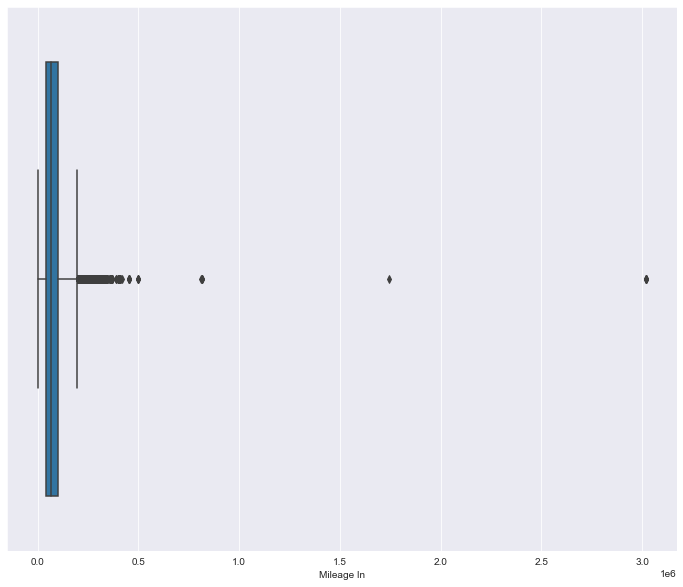

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'Mileage In')

In [19]:
from scipy import stats

shapiro_test = stats.shapiro(df['Mileage In'])
shapiro_test

C:\Users\Padayao\Anaconda3\envs\Data Science\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6443907618522644, pvalue=0.0)

### Work Order Analysis

In [32]:
df_wo = df.groupby(['Work Order','Make'])[['labels']].count()
df_wo.head(25)

labels
Work Order Make              
3          honda            7
5          toyota           1
6          chevrolet        2
7          hyundai          3
8          toyota           7
9          mitsubishi       2
10         mitsubishi      15
           toyota          14
11         ford             6
           toyota           6
13         volvo            8
17         honda            8
18         toyota          12
19         mitsubishi      15
20         hyundai          8
           mazda           37
21         toyota           5
25         ford             1
26         nissan          10
27         nissan           9
28         honda           12
           isuzu            1
30         mitsubishi       6
31         chevrolet       10
           ford             1